<a href="https://colab.research.google.com/github/ArjavMehta01/Truist-Credit_Risk_SAS/blob/Nishang/jumboplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdate

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [67]:
cur = pd.read_csv('/content/drive/My Drive/summer project/Copy of cur.csv')
cur['Act_date']= pd.to_datetime(cur['Act_date'],format='%m/%d/%y') 


In [68]:
de = pd.read_csv('/content/drive/My Drive/summer project/Copy of del.csv')
de['Act_date']= pd.to_datetime(de['Act_date'],format= '%m/%d/%y') 


In [69]:
Next_stat =cur.Next_stat
Next_stat2 =de.Next_stat
# use p,P2 to calculate the P(DEL),P(SDQ)
cur['p']= Next_stat.apply(lambda x: x=="DEL")
#print(cur,'/n')
cur['p'] = cur['p']*1
# p%
cur['p'] = cur['p']*100
#print(cur)
de['p2']= Next_stat2.apply(lambda x: x=="SDQ")
#print(de,'/n')
de['p2'] = de['p2']*1
#p2%
de['p2'] = de['p2']*100
#print(de)
cur['flag']= cur['Orig_amt'].apply(lambda x: x>510400)
de['flag']= de['Orig_amt'].apply(lambda x: x>510400)
print(cur.head(),'\n',de.head())

        Loan_id  Orig_amt  Orig_dte  Oltv  ...      HPI  CLTV  p   flag
0  196441277123    336000  01/01/06    56  ...  182.325  56.0  0  False
1  205685348267    203000  01/01/06    78  ...  182.325  78.0  0  False
2  225804687634     63000  01/01/06    15  ...  182.325  15.0  0  False
3  330090408408    417000  01/01/06    70  ...  182.325  70.0  0  False
4  462713800974     50000  01/01/06     8  ...  182.325   8.0  0  False

[5 rows x 33 columns] 
         Loan_id  Orig_amt  Orig_dte  Oltv  ...      HPI       CLTV p2   flag
0  554812224181    188000  01/01/06    36  ...  184.370  36.000000  0  False
1  183620939044     80000  01/01/06    62  ...  184.158  62.000000  0  False
2  953619041053    216000  02/01/06    80  ...  183.511  80.000000  0  False
3  183620939044     80000  01/01/06    62  ...  182.602  61.600992  0  False
4  450195474318    398000  01/01/06    80  ...  182.602  78.737954  0  False

[5 rows x 33 columns]


In [20]:
cur_table = pd.pivot_table(cur,index=["Act_date"],columns = ["flag"],values=["p"],aggfunc=np.mean)
cur_table=cur_table.replace(np.nan,0)
cur_table.columns = ['conforming','jumbo']


print(cur_table,'\n')

de_table = pd.pivot_table(de,index=["Act_date"],columns = ["flag"],values=["p2"],aggfunc=np.mean)
de_table=de_table.replace(np.nan,0)
de_table.columns = ['conforming','jumbo']
print(de_table)

            conforming  jumbo
Act_date                     
2006-01-01    0.000000    0.0
2006-02-01    0.492611    0.0
2006-03-01    0.151286    0.0
2006-04-01    0.000000    0.0
2006-05-01    0.595238    0.0
...                ...    ...
2019-07-01    4.347826    0.0
2019-08-01    0.434128    0.0
2019-09-01    0.286956    0.0
2019-10-01    0.000000    0.0
2019-11-01    0.222169    0.0

[167 rows x 2 columns] 

            conforming  jumbo
Act_date                     
2006-03-01    0.000000    0.0
2006-05-01    0.000000    0.0
2006-06-01    0.000000    0.0
2006-08-01    0.000000    0.0
2006-09-01    0.000000    0.0
...                ...    ...
2019-06-01    4.214559    0.0
2019-08-01    6.172840    0.0
2019-09-01    3.982301    0.0
2019-10-01    0.000000    0.0
2019-11-01    4.132231    0.0

[142 rows x 2 columns]


In [75]:
from matplotlib.dates import DateFormatter, YearLocator,MonthLocator
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (18, 8))
def times_plot(dataset,flag):
  data = dataset[flag]
  years = YearLocator()        # major ticks on the years
  yearFormatter = DateFormatter('%y')  # e.g.,  12
  ax = fig.add_subplot(1,1,1)
  ax.xaxis.set_major_locator(years)
  ax.xaxis.set_major_formatter(yearFormatter)
  #ax.xaxis_date()
  #ax.autoscale_view()
#plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
  plt.plot(data.index, data.values,'o',color='black',label=flag)

<Figure size 1296x576 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  app.launch_new_instance()


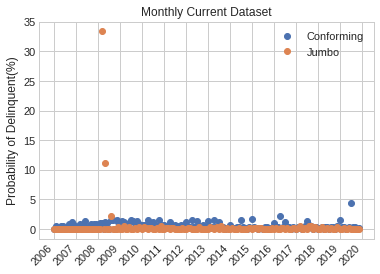

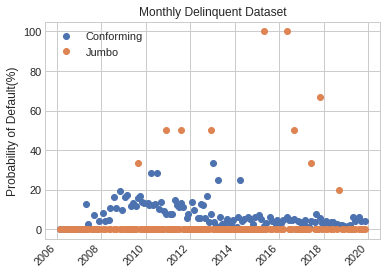

In [90]:
from matplotlib.dates import DateFormatter, YearLocator,MonthLocator
plt.style.use('seaborn-whitegrid')
years = YearLocator()        # major ticks on the years
months = MonthLocator()              # minor ticks on the months
yearFormatter = DateFormatter('%Y')  # e.g.,  12
monthFormatter = DateFormatter('%m')      # e.g., 12
fig = plt.figure(1)
# plot the P(DEL) for CUR Dataset
ax = fig.add_subplot(1,1,1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(yearFormatter)
ax.xaxis_date()
ax.autoscale_view()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels=('nonjumbo','jumbo'))
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.ylabel('Probability of Delinquent(%)')

plt.title('Monthly Current Dataset')
#plt.legend(labels=('nonjumbo','jumbo'))
plt.plot(cur_table.index,cur_table.conforming,'o',label='Conforming')
plt.plot(cur_table.index,cur_table.jumbo,'o',label='Jumbo')
plt.legend()
plt.show()

plt.plot(de_table.index,de_table.conforming,'o',label='Conforming')
plt.plot(de_table.index,de_table.jumbo,'o',label='Jumbo')
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend(loc='upper left')
plt.ylabel('Probability of Default(%)')
plt.title('Monthly Delinquent Dataset')
plt.show()

Text(0.5, 1.0, 'Monthly Delinquent Dataset')

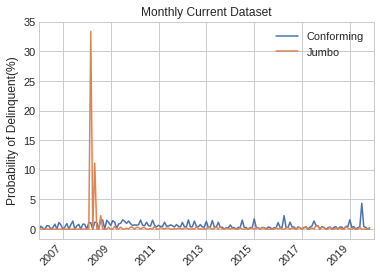

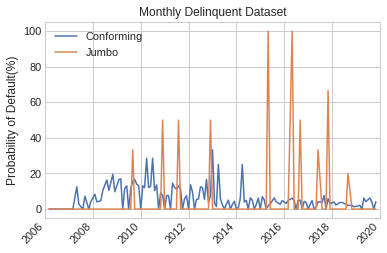

In [88]:
# plot the P(DEL) for CUR Dataset
sns.set()  # use Seaborn styles
plt.style.use('seaborn-whitegrid')
cur.pivot_table('p', index='Act_date', columns='flag', aggfunc='mean').replace(np.nan,0).plot()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Probability of Delinquent(%)')
plt.xlim('2006','2020')
plt.xlabel('')
plt.title('Monthly Current Dataset')
plt.legend(labels=('Conforming','Jumbo'))

# plot the P(SDQ) for DEL Dataset

de.pivot_table('p2', index='Act_date', columns='flag', aggfunc='mean').replace(np.nan,0).plot()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Probability of Default(%)')
plt.xlim('2006','2020')
plt.legend(labels=('Conforming','Jumbo'))
plt.xlabel('')
plt.title('Monthly Delinquent Dataset')

In [70]:
##Quaterly group
cur.set_index('Act_date', inplace=True)
de.set_index('Act_date', inplace=True)
curQ = cur.to_period('Q')
deQ = de.to_period('Q')


In [71]:

curQ.index= curQ.index.to_timestamp()
deQ.index= deQ.index.to_timestamp()
#curQ.head()

In [77]:

Q_cur_table = pd.pivot_table(curQ,index=["Act_date"],columns = ["flag"],values=["p"],aggfunc=np.mean)
Q_cur_table=Q_cur_table.replace(np.nan,0)
Q_de_table = pd.pivot_table(deQ,index=["Act_date"],columns = ["flag"],values=["p2"],aggfunc=np.mean)
Q_de_table=Q_de_table.replace(np.nan,0)
Q_cur_table.columns = ['conforming','jumbo']


Q_de_table.columns = ['conforming','jumbo']

print(Q_cur_table.head(),'\n',Q_de_table.head())

            conforming  jumbo
Act_date                     
2006-01-01    0.230150    0.0
2006-04-01    0.537924    0.0
2006-07-01    0.680760    0.0
2006-10-01    0.833797    0.0
2007-01-01    0.756680    0.0 
             conforming  jumbo
Act_date                     
2006-01-01         0.0    0.0
2006-04-01         0.0    0.0
2006-07-01         0.0    0.0
2006-10-01         0.0    0.0
2007-01-01         0.0    0.0


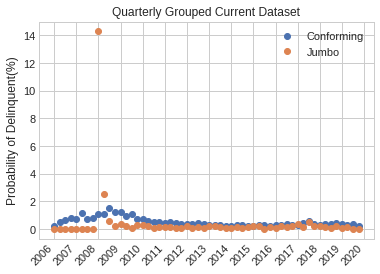

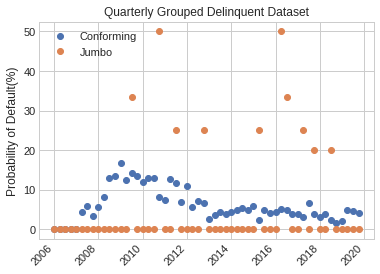

In [85]:
from matplotlib.dates import DateFormatter, YearLocator,MonthLocator
plt.style.use('seaborn-whitegrid')

years = YearLocator()        # major ticks on the years
months = MonthLocator()              # minor ticks on the months
yearFormatter = DateFormatter('%Y')  # e.g.,  12
monthFormatter = DateFormatter('%m')      # e.g., 12
fig = plt.figure(1)
# plot the P(DEL) for CUR Dataset
ax = fig.add_subplot(1,1,1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(yearFormatter)
ax.xaxis_date()
ax.autoscale_view()
handles, labels = ax.get_legend_handles_labels()

plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.plot(Q_cur_table.index,Q_cur_table.conforming,'o',label='Conforming')
plt.plot(Q_cur_table.index,Q_cur_table.jumbo,'o',label='Jumbo')
plt.ylabel('Probability of Delinquent(%)')
plt.title('Quarterly Grouped Current Dataset')
plt.legend()
plt.show()


plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.plot(Q_de_table.index,Q_de_table.conforming,'o',label='Conforming')
plt.plot(Q_de_table.index,Q_de_table.jumbo,'o',label='Jumbo')
plt.legend(loc='upper left')
plt.ylabel('Probability of Default(%)')
plt.title('Quarterly Grouped Delinquent Dataset')
plt.show()

Text(0.5, 0, '')

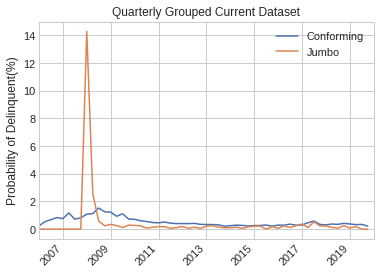

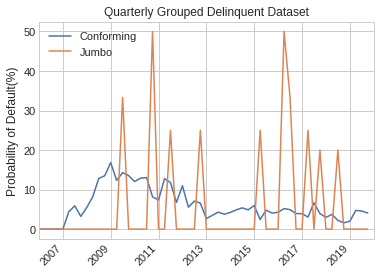

In [86]:
# plot the P(DEL) for CUR Dataset
sns.set()  # use Seaborn styles
plt.style.use('seaborn-whitegrid')
curQ.pivot_table('p', index='Act_date', columns='flag', aggfunc='mean').replace(np.nan,0).plot()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Probability of Delinquent(%)')
plt.xlim('2006','2020')
plt.xlabel('')
plt.title('Quarterly Grouped Current Dataset')
plt.legend(labels=('Conforming','Jumbo'))

# plot the P(SDQ) for DEL Dataset

deQ.pivot_table('p2', index='Act_date', columns='flag', aggfunc='mean').replace(np.nan,0).plot()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Probability of Default(%)')
plt.xlim('2006','2020')
plt.legend(labels=('Conforming','Jumbo'))
plt.title('Quarterly Grouped Delinquent Dataset')
plt.xlabel('')